# Scotia Data Science Day

## Team Name: B4U

### Author: Tao Shan, Yuxuan Liu, Fanghe Lin, Peiyi Zheng

### Description: 

*   We have been assigned the responsibility of constructing an efficient fraud detection system that can accurately identify fraudulent transactions. Furthermore, we are expected to furnish suggestions and recommendations for avoiding fraud in the future. To accomplish this, we will need to study the data, discover patterns and tendencies, and establish methods for detecting and avoiding fraud.

### Strategies:

*   Data Analytics steps including External Data, Data Cleaning, Data Exploration, Data Preprocessing, Data Modeling, Interpret Model and Submission.
*   Each section above includes an summary for the code.

### Hyperlinks:
*   [Data Cleaning](#1)
*   [External Data](#2)
*   [Data Exploration](#3)
*   [Data Preprocessing](#4)
*   [Data Modeling](#5)
*   [Interpret Model](#6)
*   [Submission](#7)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pickle
import time
import re
import random
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
# preprocessing packages
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
#from category_encoders import WOEEncoder
#from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeClassifier
import lightgbm as ltb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance, XGBClassifier

In [ ]:
DIR_PATH = "/content/drive/MyDrive/B4U scotia bank competition/datasets"

<a name="1"></a>
# Data Cleanning

### Description:


*   Clean missing values: imputation with frequency for categorical data, USER_AGENT and CITY
*   Check does USER_AGENT and CITY always missing together
*   Create a new column, with NAN or not NAN, because about 86% of the column is missing
*   Impute missing values by "Missing", since only certain types of transactions have user agent and city



In [ ]:
df = pd.read_csv(
    os.path.join(DIR_PATH, f"train_ScotiaDSD.csv")
)
df.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,...,COUNT_LOW_AMT_PAST_30DAY,COUNT_MANUAL_ENTRY_PAST_30DAY,COUNT_PHONE_ORDER_PAST_30DAY,COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY,COUNT_PLANNED_PAST_30DAY,COUNT_SWIPE_PAST_30DAY,COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,PREV_M_INFLATION,PREV_M_UNEMP_RATE
0,2,4,14:16,a316accb,1.0,537.10,11.70,29200.0,1,NaN,...,16,39,73,60,13,22,4,14,1.1,5.7
1,2,4,12:51,8352728b,0.0,20371.88,96.35,30700.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,1,50,93,93,0,0,0,0,1.1,5.7
2,2,4,15:26,d50120e1,0.0,15628.17,193.72,19500.0,0,NaN,...,9,3,42,42,2,33,0,12,1.1,5.7
3,2,4,16:19,e96e2139,0.0,12913.98,47.15,18400.0,0,NaN,...,4,7,75,72,12,61,0,20,1.1,5.7
4,2,4,8:15:,32502a99,0.0,26779.35,121.88,29200.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,11,6,41,42,10,30,4,16,1.1,5.7


In [ ]:
df_test = pd.read_csv(
    os.path.join(DIR_PATH, f"test_ScotiaDSD.csv")
)
df_test.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,...,COUNT_LOW_AMT_PAST_30DAY,COUNT_MANUAL_ENTRY_PAST_30DAY,COUNT_PHONE_ORDER_PAST_30DAY,COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY,COUNT_PLANNED_PAST_30DAY,COUNT_SWIPE_PAST_30DAY,COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,PREV_M_INFLATION,PREV_M_UNEMP_RATE
0,6,6,10:21,eed6f943,NaN,8547.48,0.97,20500.0,0,NaN,...,7,2,25,21,0,22,0,1,1.2,5.8
1,3,2,16:56,f5cd3ab1,NaN,24641.17,37.05,30700.0,0,NaN,...,7,5,44,47,13,29,0,15,1.1,5.7
2,4,4,19:43,9dc2fd8e,NaN,3481.93,183.47,5100.0,0,NaN,...,12,1,43,38,3,36,0,14,1.5,5.7
3,3,3,12:56,ce5560f4,NaN,16371.30,27.68,17500.0,0,NaN,...,6,9,47,43,2,27,0,19,1.1,5.7
4,5,5,9:52:,ece4a7d1,NaN,279.82,54.60,4600.0,0,NaN,...,0,0,7,6,2,7,0,2,1.6,5.9


In [ ]:
df.iloc[:,10:20].head()

,CITY,FLAG_LX,FLAG_ATM,FLAG_AUTO,FLAG_CASH,FLAG_LS,FLAG_DISCOUNT,FLAG_RECREA,FLAG_ELCTRNCS,FLAG_REG_AMT
0,NaN,0,0,1,0,0,0,0,0,0
1,lasalle,0,0,0,0,0,0,0,0,0
2,NaN,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,1,0,0
4,rockland,0,0,0,0,0,0,0,0,0


In [ ]:
# clean the event_time column
df["EVENT_TIME"] = df["EVENT_TIME"].apply(lambda x: re.sub(r':$', '', x))
df["EVENT_TIME"] = pd.to_datetime(df["EVENT_TIME"], format='%H:%M').dt.time
df_test["EVENT_TIME"] = df_test["EVENT_TIME"].apply(lambda x: re.sub(r':$', '', x))
df_test["EVENT_TIME"] = pd.to_datetime(df_test["EVENT_TIME"], format='%H:%M').dt.time

In [ ]:
df.shape

(89230, 175)

In [ ]:
# Null value counts
df.isnull().sum().sort_values(ascending = False)/df.shape[0]

USER_AGENT                                  0.866547
CITY                                        0.866547
EVENT_MONTH                                 0.000000
MAX_PHONE_ORDER_PAST_30DAY                  0.000000
MEAN_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY    0.000000
                                              ...   
MAX_PURCHASE_EXCLUDING_GAS_PAST_7DAY        0.000000
MAX_SWIPE_PAST_7DAY                         0.000000
MAX_WEEKEND_PAST_7DAY                       0.000000
STD_LX_PAST_7DAY                            0.000000
PREV_M_UNEMP_RATE                           0.000000
Length: 175, dtype: float64

In [ ]:
# Null value counts
df_test.isnull().sum().sort_values(ascending = False)/df_test.shape[0]

FRAUD_FLAG                              1.000000
USER_AGENT                              0.866813
CITY                                    0.866813
EVENT_MONTH                             0.000000
MAX_PHONE_ORDER_PAST_30DAY              0.000000
                                          ...   
MAX_PURCHASE_EXCLUDING_GAS_PAST_7DAY    0.000000
MAX_SWIPE_PAST_7DAY                     0.000000
MAX_WEEKEND_PAST_7DAY                   0.000000
STD_LX_PAST_7DAY                        0.000000
PREV_M_UNEMP_RATE                       0.000000
Length: 175, dtype: float64

Does USER_AGENT and CITY always missing together?                                

In [ ]:
(df['USER_AGENT'].isna() & df['CITY'].isna()).sum()/df.shape[0]

0.8665471254062534

Answer is yes, the percentage is same as each column's missing rate

In [ ]:
# sample of USER_AGENT column
df.USER_AGENT[0:5]

0                                                  NaN
1    Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...
2                                                  NaN
3                                                  NaN
4    Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...
Name: USER_AGENT, dtype: object

In [ ]:
df.USER_AGENT.nunique()

1229

In [ ]:
# sample of CITY column
df.CITY[0:5]

0         NaN
1     lasalle
2         NaN
3         NaN
4    rockland
Name: CITY, dtype: object

In [ ]:
df.CITY.nunique()

915

Now we knows the column USER_AGENT and CITY has missing values about 87%, and two columns always missing together. These two columns are categorical. The assumption: the data is missing at random.

Methods for dealing the missing values including: 
1. Create a new column, with NAN or not NAN
1. impute missing values by "Missing", since only certain types of transactions have user agent and city

In [ ]:
# method 1
df['USER_AGENT_NAN'] = df.USER_AGENT.isna()
df['CITY_NAN'] = df.CITY.isna()

In [ ]:
# method 1
df_test['USER_AGENT_NAN'] = df_test.USER_AGENT.isna()
df_test['CITY_NAN'] = df_test.CITY.isna()

In [ ]:
# method 2
df['USER_AGENT'] = df.USER_AGENT.fillna('Missing')
df['CITY'] = df.CITY.fillna('Missing')

In [ ]:
# method 2
df_test['USER_AGENT'] = df_test.USER_AGENT.fillna('Missing')
df_test['CITY'] = df_test.CITY.fillna('Missing')

In [ ]:
# Data sample After Cleanning
df.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,...,COUNT_PHONE_ORDER_PAST_30DAY,COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY,COUNT_PLANNED_PAST_30DAY,COUNT_SWIPE_PAST_30DAY,COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,PREV_M_INFLATION,PREV_M_UNEMP_RATE,USER_AGENT_NAN,CITY_NAN
0,2,4,14:16:00,a316accb,1.0,537.10,11.70,29200.0,1,Missing,...,73,60,13,22,4,14,1.1,5.7,True,True
1,2,4,12:51:00,8352728b,0.0,20371.88,96.35,30700.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,93,93,0,0,0,0,1.1,5.7,False,False
2,2,4,15:26:00,d50120e1,0.0,15628.17,193.72,19500.0,0,Missing,...,42,42,2,33,0,12,1.1,5.7,True,True
3,2,4,16:19:00,e96e2139,0.0,12913.98,47.15,18400.0,0,Missing,...,75,72,12,61,0,20,1.1,5.7,True,True
4,2,4,08:15:00,32502a99,0.0,26779.35,121.88,29200.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,41,42,10,30,4,16,1.1,5.7,False,False


In [ ]:
df.isnull().sum().sort_values(ascending = False)/df.shape[0]

EVENT_MONTH                                 0.0
COUNT_ELCTRNCS_PAST_7DAY                    0.0
MEAN_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY    0.0
MEAN_WEEKEND_PAST_30DAY                     0.0
MAX_AUTO_PAST_30DAY                         0.0
                                           ... 
MAX_PURCHASE_EXCLUDING_GAS_PAST_7DAY        0.0
MAX_SWIPE_PAST_7DAY                         0.0
MAX_WEEKEND_PAST_7DAY                       0.0
STD_LX_PAST_7DAY                            0.0
CITY_NAN                                    0.0
Length: 177, dtype: float64



<a name="2"></a>
# External data:

First, understand why people fraud. 

https://www.counterfraud.gov.au/explore-fraud-problem#:~:text=People%20are%20pressured%20to%20commit,health%20problems%20or%20crippling%20debts.

Accroding to one of the government website, people fraud because of:
1. Pressure
*   Easy financial gain
*   pressured by negative influences such as loss of employment or status,  gambling addictions, health problems or crippling debts
*   Possible attributes: unemployment rate, COVID positive rate, hospitally service, ICU remain, number of death, Canada average debts per person
2. opportunity to commit fraud

3. Rationalisation
* Such rationalisations include:

  * “I’ll pay it back later”
  * “No one will even notice it’s gone”
  * “I deserve it”
  * “I pay enough tax”
  * “I’m doing it for my family”.
  * the reasons are too personal that not helpful for our analysis

So we will add data such as COVID positive rate, hospitally service, ICU remain, number of death, Canada average debts per person from the data source below:

* Covid Data is from https://health-infobase.canada.ca/covid-19/current-situation.html?stat=num&measure=cases_total&map=pt#a2, Our file name: covid19-download.csv
* Life expectancy and deaths: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310039201 Because we don't know monthly data from the external data website, we choose to not use it
* interest rate of bank of canada (from 2020-12-01 to 2021-11-30): https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1010013901&cubeTimeFrame.startDaily=2020-12-01&cubeTimeFrame.endDaily=2021-11-30&referencePeriods=20201201%2C20211130, 1010013901-eng.csv

Finally from these data sources we found, we choose to add Covid Data, including total number of covid and total number of depths in the last 14 days. Also we think the bond yield and market rate data also might relate to the Economics. The status of Economics which is a key factor of unemployment,  crippling debts, financial gain. So we choose to include some of the information from central bank's dataset. We are adding the data information accroding to each months.








In [ ]:
covid_df = pd.read_csv(
    os.path.join(DIR_PATH, f"covid19-download.csv")
)
covid_df.head()

,pruid,prname,prnameFR,date,reporting_week,reporting_year,update,totalcases,numtotal_last7,ratecases_total,...,ratecases_last7,ratedeaths_last7,numtotal_last14,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,59,British Columbia,Colombie-Britannique,2020-02-01,5,2020,1.0,1,1.0,0.02,...,0.02,0.0,NaN,NaN,NaN,NaN,0.18,0.0,0.0,0.0
1,48,Alberta,Alberta,2020-02-01,5,2020,1.0,0,0.0,0.00,...,0.00,0.0,NaN,NaN,NaN,NaN,0.00,0.0,0.0,0.0
2,47,Saskatchewan,Saskatchewan,2020-02-01,5,2020,1.0,0,0.0,0.00,...,0.00,0.0,NaN,NaN,NaN,NaN,0.00,0.0,0.0,0.0
3,46,Manitoba,Manitoba,2020-02-01,5,2020,1.0,0,0.0,0.00,...,0.00,0.0,NaN,NaN,NaN,NaN,0.00,0.0,0.0,0.0
4,35,Ontario,Ontario,2020-02-01,5,2020,1.0,3,3.0,0.02,...,0.02,0.0,NaN,NaN,NaN,NaN,0.43,0.0,0.0,0.0


In [ ]:
# our analysis focus on year 2021, find the data for canada for each first weeks
covid_df["date"] = pd.to_datetime(covid_df["date"], format='%Y-%m-%d')
covid_df["month"] = covid_df['date'].dt.month
covid_df = covid_df[(covid_df['prname'] == 'Canada') & (covid_df['reporting_year'] == 2021)].groupby(covid_df['month']).first()
covid_df.head()

,pruid,prname,prnameFR,date,reporting_week,reporting_year,update,totalcases,numtotal_last7,ratecases_total,...,ratedeaths_last7,numtotal_last14,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,month
month,,,,,,,,,,,,,,,,,,,,,
1,1,Canada,Canada,2021-01-09,1,2021,NaN,649409,55697.0,1668.15,...,2.54,105576.0,1872.0,271.20,4.81,7956.75,20.44,141.43,0.36,1
2,1,Canada,Canada,2021-02-06,5,2021,NaN,795025,25752.0,2042.20,...,1.83,57338.0,1590.0,147.29,4.08,3678.86,9.45,101.57,0.26,2
3,1,Canada,Canada,2021-03-06,9,2021,NaN,877366,19814.0,2253.71,...,0.57,40659.0,484.0,104.44,1.24,2830.61,7.27,31.94,0.08,3
4,1,Canada,Canada,2021-04-03,13,2021,NaN,996776,40572.0,2560.44,...,0.50,72124.0,401.0,185.27,1.03,5795.96,14.89,27.57,0.07,4
5,1,Canada,Canada,2021-05-01,17,2021,NaN,1224682,55468.0,3145.86,...,0.88,112834.0,677.0,289.84,1.74,7924.06,20.35,48.81,0.13,5


In [ ]:
# use last 14 day's deaths and total cases
covid_df = covid_df[['month','ratetotal_last14', 'numdeaths_last14']].reset_index(drop = True)
# Add all useful external data
df=pd.merge(df,covid_df, left_on='EVENT_MONTH', right_on = 'month', how='left')
df_test=pd.merge(df_test,covid_df, left_on='EVENT_MONTH', right_on = 'month', how='left')
df.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,...,COUNT_SWIPE_PAST_30DAY,COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,PREV_M_INFLATION,PREV_M_UNEMP_RATE,USER_AGENT_NAN,CITY_NAN,month,ratetotal_last14,numdeaths_last14
0,2,4,14:16:00,a316accb,1.0,537.10,11.70,29200.0,1,Missing,...,22,4,14,1.1,5.7,True,True,2,147.29,1590.0
1,2,4,12:51:00,8352728b,0.0,20371.88,96.35,30700.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,0,0,0,1.1,5.7,False,False,2,147.29,1590.0
2,2,4,15:26:00,d50120e1,0.0,15628.17,193.72,19500.0,0,Missing,...,33,0,12,1.1,5.7,True,True,2,147.29,1590.0
3,2,4,16:19:00,e96e2139,0.0,12913.98,47.15,18400.0,0,Missing,...,61,0,20,1.1,5.7,True,True,2,147.29,1590.0
4,2,4,08:15:00,32502a99,0.0,26779.35,121.88,29200.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,30,4,16,1.1,5.7,False,False,2,147.29,1590.0


In [ ]:
# the dataset has missing values on weekends
bank_df = pd.read_csv(
    os.path.join(DIR_PATH, f"1010013901-eng.csv"), skiprows=9
).iloc[1:,:].T
bank_df.columns = bank_df.iloc[0]
bank_df = bank_df[1:].iloc[:,0:27]
bank_df.head()

Financial market statistics,Overnight money market financing,"Government of Canada benchmark bond yields, 2 year","Government of Canada benchmark bond yields, 3 year","Government of Canada benchmark bond yields, 5 year","Government of Canada benchmark bond yields, 7 year","Government of Canada benchmark bond yields, 10 year","Government of Canada benchmark bond yields, long term","Real return benchmark bond yield, long term","Government of Canada marketable bonds, 1 to 3 years","Government of Canada marketable bonds, 3 to 5 years",...,"Bankers' acceptances rate, 1-month (Terminated)","Bankers' acceptances rate, 2-month (Terminated)","Bankers' acceptances rate, 3-month (Terminated)","Prime corporate paper rate, 1-month (Terminated)","Prime corporate paper rate, 2-month (Terminated)","Prime corporate paper rate, 3-month (Terminated)","Operating band, low","Operating band, high",Bank rate,Target rate
"December 1, 2020",0.2291,0.26,0.30,0.46,0.53,0.74,1.23,-0.2906,0.25,0.40,...,..t,..t,..t,..t,..t,..t,0.250,0.500,0.500,0.2500
"December 2, 2020",0.2227,0.27,0.31,0.47,0.54,0.76,1.28,-0.2246,0.26,0.41,...,..t,..t,..t,..t,..t,..t,0.250,0.500,0.500,0.2500
"December 3, 2020",0.2196,0.26,0.30,0.46,0.53,0.74,1.26,-0.2374,0.26,0.40,...,..t,..t,..t,..t,..t,..t,0.250,0.500,0.500,0.2500
"December 4, 2020",0.2082,0.28,0.32,0.50,0.57,0.80,1.34,-0.1636,0.27,0.43,...,..t,..t,..t,..t,..t,..t,0.250,0.500,0.500,0.2500
"December 5, 2020",..,..,..,..,..,..,..,..,..,..,...,..t,..t,..t,..t,..t,..t,..,..,..,..


In [ ]:
bank_df.iloc[:,17:27].head()

Financial market statistics,"Bankers' acceptances rate, 1-month (Terminated)","Bankers' acceptances rate, 2-month (Terminated)","Bankers' acceptances rate, 3-month (Terminated)","Prime corporate paper rate, 1-month (Terminated)","Prime corporate paper rate, 2-month (Terminated)","Prime corporate paper rate, 3-month (Terminated)","Operating band, low","Operating band, high",Bank rate,Target rate
"December 1, 2020",..t,..t,..t,..t,..t,..t,0.250,0.500,0.500,0.2500
"December 2, 2020",..t,..t,..t,..t,..t,..t,0.250,0.500,0.500,0.2500
"December 3, 2020",..t,..t,..t,..t,..t,..t,0.250,0.500,0.500,0.2500
"December 4, 2020",..t,..t,..t,..t,..t,..t,0.250,0.500,0.500,0.2500
"December 5, 2020",..t,..t,..t,..t,..t,..t,..,..,..,..


In [ ]:
# delete columns from 17:23, and delete rows with '..'
bank_df.drop(bank_df.columns[17:23], axis=1, inplace= True)
bank_df = bank_df[~bank_df.eq('..').any(1)]
bank_df.head()

Financial market statistics,Overnight money market financing,"Government of Canada benchmark bond yields, 2 year","Government of Canada benchmark bond yields, 3 year","Government of Canada benchmark bond yields, 5 year","Government of Canada benchmark bond yields, 7 year","Government of Canada benchmark bond yields, 10 year","Government of Canada benchmark bond yields, long term","Real return benchmark bond yield, long term","Government of Canada marketable bonds, 1 to 3 years","Government of Canada marketable bonds, 3 to 5 years",...,"Government of Canada marketable bonds, over 10 years","Treasury Bills, 1-month","Treasury Bills, 2-month","Treasury Bills, 3-month","Treasury Bills, 6-month","Treasury Bills, 1-year","Operating band, low","Operating band, high",Bank rate,Target rate
"December 1, 2020",0.2291,0.26,0.30,0.46,0.53,0.74,1.23,-0.2906,0.25,0.40,...,1.08,0.10,0.10,0.12,0.15,0.20,0.250,0.500,0.500,0.2500
"December 2, 2020",0.2227,0.27,0.31,0.47,0.54,0.76,1.28,-0.2246,0.26,0.41,...,1.17,0.10,0.11,0.12,0.15,0.21,0.250,0.500,0.500,0.2500
"December 3, 2020",0.2196,0.26,0.30,0.46,0.53,0.74,1.26,-0.2374,0.26,0.40,...,1.15,0.11,0.11,0.12,0.16,0.21,0.250,0.500,0.500,0.2500
"December 4, 2020",0.2082,0.28,0.32,0.50,0.57,0.80,1.34,-0.1636,0.27,0.43,...,1.22,0.12,0.11,0.12,0.15,0.21,0.250,0.500,0.500,0.2500
"December 7, 2020",0.2184,0.28,0.32,0.48,0.55,0.76,1.31,-0.1876,0.27,0.42,...,1.19,0.12,0.11,0.12,0.15,0.22,0.250,0.500,0.500,0.2500


In [ ]:
# find the latest date in each month (not null)
bank_df['date'] = bank_df.index
bank_df['date'] = pd.to_datetime(bank_df['date'])
start_date = '2020-12-01'
end_date = '2021-11-30'
bank_df = bank_df[(bank_df['date']<=end_date) & (bank_df['date']>=start_date)]
bank_df['month_for_predict'] = (bank_df['date'].dt.month)%12+1
bank_df = bank_df.groupby(bank_df['date'].dt.month).apply(lambda x: x[x['date'] == x['date'].max()])
bank_df.reset_index(drop=True, inplace=True)
bank_df.head()

<ipython-input-242-2bd380cccc52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df['date'] = bank_df.index
<ipython-input-242-2bd380cccc52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df['date'] = pd.to_datetime(bank_df['date'])


Financial market statistics,Overnight money market financing,"Government of Canada benchmark bond yields, 2 year","Government of Canada benchmark bond yields, 3 year","Government of Canada benchmark bond yields, 5 year","Government of Canada benchmark bond yields, 7 year","Government of Canada benchmark bond yields, 10 year","Government of Canada benchmark bond yields, long term","Real return benchmark bond yield, long term","Government of Canada marketable bonds, 1 to 3 years","Government of Canada marketable bonds, 3 to 5 years",...,"Treasury Bills, 2-month","Treasury Bills, 3-month","Treasury Bills, 6-month","Treasury Bills, 1-year","Operating band, low","Operating band, high",Bank rate,Target rate,date,month_for_predict
0,0.1878,0.15,0.18,0.43,0.54,0.84,1.47,-0.1112,0.14,0.34,...,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2021-01-29,2
1,0.2151,0.30,0.40,0.88,1.04,1.35,1.76,0.1071,0.30,0.70,...,0.12,0.13,0.18,0.22,0.250,0.500,0.500,0.2500,2021-02-26,3
2,0.1184,0.22,0.49,0.99,1.26,1.55,1.97,0.2248,0.23,0.74,...,0.07,0.09,0.12,0.16,0.250,0.500,0.500,0.2500,2021-03-31,4
3,0.1637,0.30,0.48,0.93,1.22,1.54,2.08,0.3980,0.29,0.74,...,0.06,0.11,0.15,0.20,0.250,0.500,0.500,0.2500,2021-04-30,5
4,0.1947,0.32,0.51,0.90,1.19,1.49,2.03,0.2128,0.31,0.74,...,0.09,0.12,0.13,0.20,0.250,0.500,0.500,0.2500,2021-05-31,6


In [ ]:
# Add all useful external data
df=pd.merge(df,bank_df, left_on='EVENT_MONTH', right_on = 'month_for_predict', how='left')
df_test=pd.merge(df_test,bank_df, left_on='EVENT_MONTH', right_on = 'month_for_predict', how='left')
df.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,...,"Treasury Bills, 2-month","Treasury Bills, 3-month","Treasury Bills, 6-month","Treasury Bills, 1-year","Operating band, low","Operating band, high",Bank rate,Target rate,date,month_for_predict
0,2,4,14:16:00,a316accb,1.0,537.10,11.70,29200.0,1,Missing,...,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2021-01-29,2
1,2,4,12:51:00,8352728b,0.0,20371.88,96.35,30700.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2021-01-29,2
2,2,4,15:26:00,d50120e1,0.0,15628.17,193.72,19500.0,0,Missing,...,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2021-01-29,2
3,2,4,16:19:00,e96e2139,0.0,12913.98,47.15,18400.0,0,Missing,...,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2021-01-29,2
4,2,4,08:15:00,32502a99,0.0,26779.35,121.88,29200.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2021-01-29,2


In [ ]:
# Check Missing Values
df.isnull().sum().sort_values(ascending = False)/df.shape[0]

EVENT_MONTH                               0.0
SUM_AUTO_PAST_30DAY                       0.0
STD_REG_AMT_PAST_30DAY                    0.0
STD_HIGH_RECREA_PAST_30DAY                0.0
STD_INTERNET_PAST_30DAY                   0.0
                                         ... 
STD_SWIPE_PAST_7DAY                       0.0
STD_TRAVEL_AND_ENTERTAINMENT_PAST_7DAY    0.0
SUM_LX_PAST_7DAY                          0.0
SUM_AUTO_PAST_7DAY                        0.0
month_for_predict                         0.0
Length: 203, dtype: float64

In [ ]:
# not useful column
test_transaction_id = df_test['TRANSACTION_ID'] # for submission
df.drop(['TRANSACTION_ID','date'], axis = 1, inplace = True)
df_test.drop(['TRANSACTION_ID','date'], axis = 1, inplace = True)
df.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,CITY,...,"Treasury Bills, 1-month","Treasury Bills, 2-month","Treasury Bills, 3-month","Treasury Bills, 6-month","Treasury Bills, 1-year","Operating band, low","Operating band, high",Bank rate,Target rate,month_for_predict
0,2,4,14:16:00,1.0,537.10,11.70,29200.0,1,Missing,Missing,...,0.07,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2
1,2,4,12:51:00,0.0,20371.88,96.35,30700.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,lasalle,...,0.07,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2
2,2,4,15:26:00,0.0,15628.17,193.72,19500.0,0,Missing,Missing,...,0.07,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2
3,2,4,16:19:00,0.0,12913.98,47.15,18400.0,0,Missing,Missing,...,0.07,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2
4,2,4,08:15:00,0.0,26779.35,121.88,29200.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,rockland,...,0.07,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2


<a name="3"></a>
# Data Exploration

### Description:

*   Fraud Detection Bar Chart, to show the distributions of labels
*   Correlation map, and compare the correlation between the original data and downsampling data
*   Density plot to show the distributions between Fraud and Not Fraud for attributes. We use "COUNT_FAST_FOOD_30_Days" as an example
*   Generate Business ideas for the important columns

## Business Ideas: 

*   Between 12:00 am and 8:45 each day, compare with average, the fraud rate is more than twice.
*   Less credit limit will cause more fraud
*   SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY between 0 and 132, compare with average, the fraud rate is more than triple.







Fraud Distribution

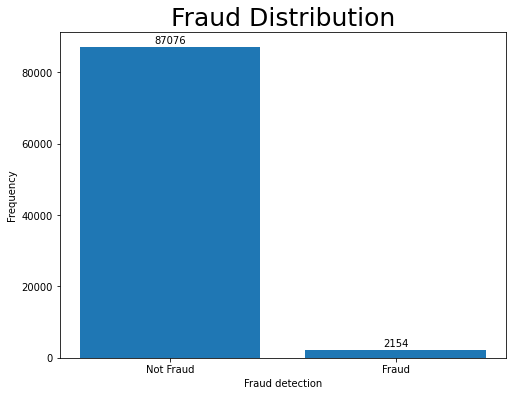

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1000, y[i], ha = 'center')

x=["Not Fraud", "Fraud"]

fraud = sum(df["FRAUD_FLAG"] == 1)
y=[df.shape[0]-fraud, fraud]

plt.figure(figsize = (8,6))
plt.bar(x,y)
addlabels(x,y)
plt.xlabel('Fraud detection')
plt.ylabel('Frequency')
plt.title('Fraud Distribution', fontsize = 25)
plt.savefig('Fraud_Label_Distribution.jpg')
plt.show()

Correlation Heatmap

In [ ]:
df.columns.get_loc('FLAG_LX')

10

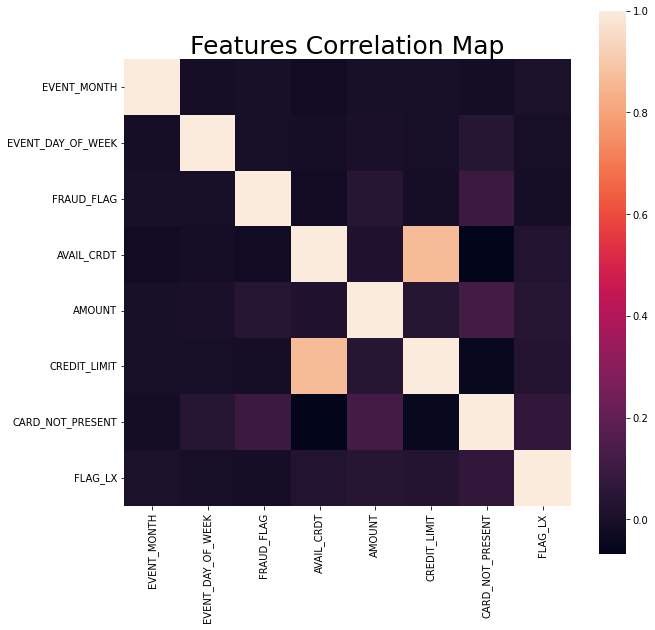

In [ ]:
corr = df[df.columns[0:11]].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, square=True)
plt.title('Features Correlation Map', fontsize = 25)
plt.savefig('feature_corr.jpg')
plt.show()

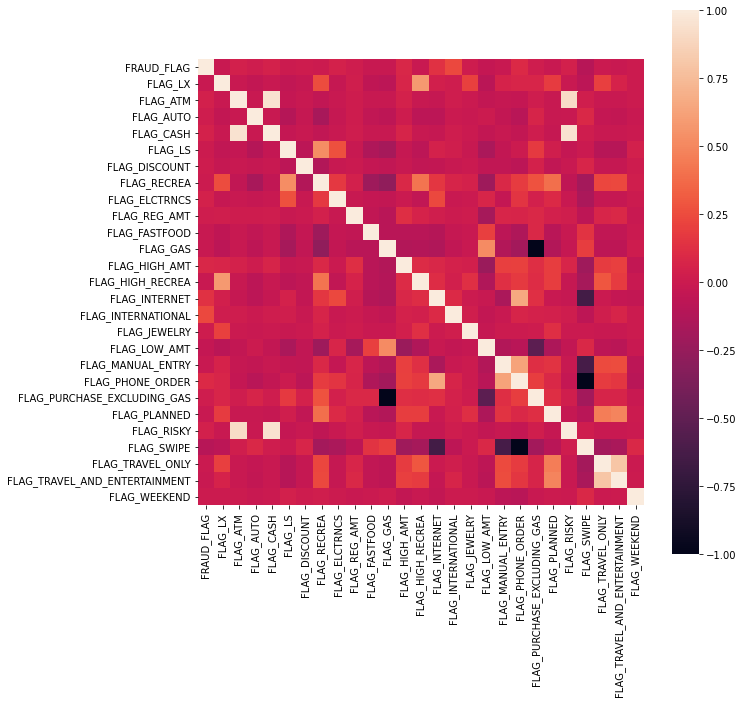

In [ ]:
corr = df.iloc[:,[3]+list(range(10,36))].corr()
corr
plt.figure(figsize = (10,10))
sns.heatmap(corr, square=True)
plt.show()

## **Downsampling**

In [ ]:
# random select the same number of data that is flaged as not fraud as fraud
random.seed(12345)
fraud_data = df[df['FRAUD_FLAG']==1]
not_fraud_data = df[df['FRAUD_FLAG']==0].sample(n=fraud)
downsample = pd.concat([fraud_data, not_fraud_data])
downsample.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,CITY,...,"Treasury Bills, 1-month","Treasury Bills, 2-month","Treasury Bills, 3-month","Treasury Bills, 6-month","Treasury Bills, 1-year","Operating band, low","Operating band, high",Bank rate,Target rate,month_for_predict
0,2,4,14:16:00,1.0,537.10,11.70,29200.0,1,Missing,Missing,...,0.07,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2
24,2,4,20:02:00,1.0,9016.80,50.23,21400.0,1,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,maple,...,0.07,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2
36,2,4,19:59:00,1.0,3135.47,41.00,19500.0,1,Mozilla/5.0 (Linux; U; Android 11; en-CA; moto...,camrose,...,0.07,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2
38,2,4,12:30:00,1.0,674.70,161.95,1000.0,1,Mozilla/5.0 (iPhone; CPU OS 15_6_1 like Mac OS...,niagara falls,...,0.07,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2
132,2,4,16:28:00,1.0,1314.30,44.08,5100.0,1,Missing,Missing,...,0.07,0.05,0.07,0.08,0.11,0.250,0.500,0.500,0.2500,2


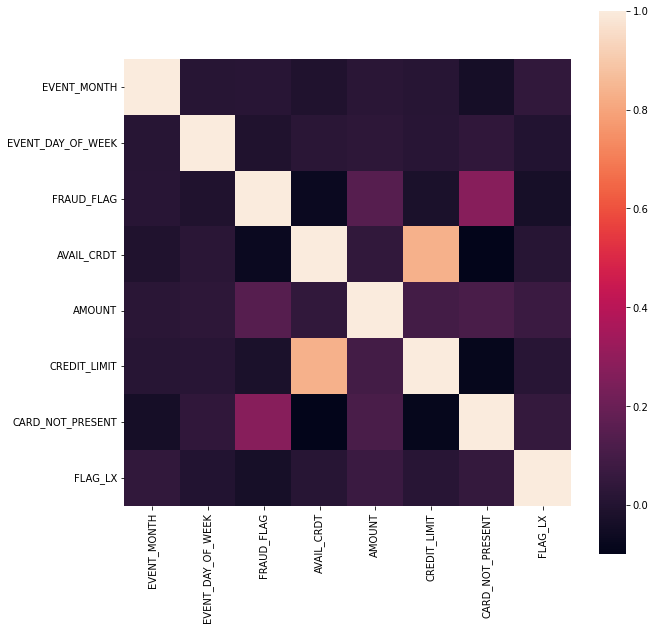

In [ ]:
corr = downsample[downsample.columns[0:11]].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, square=True)
plt.show()

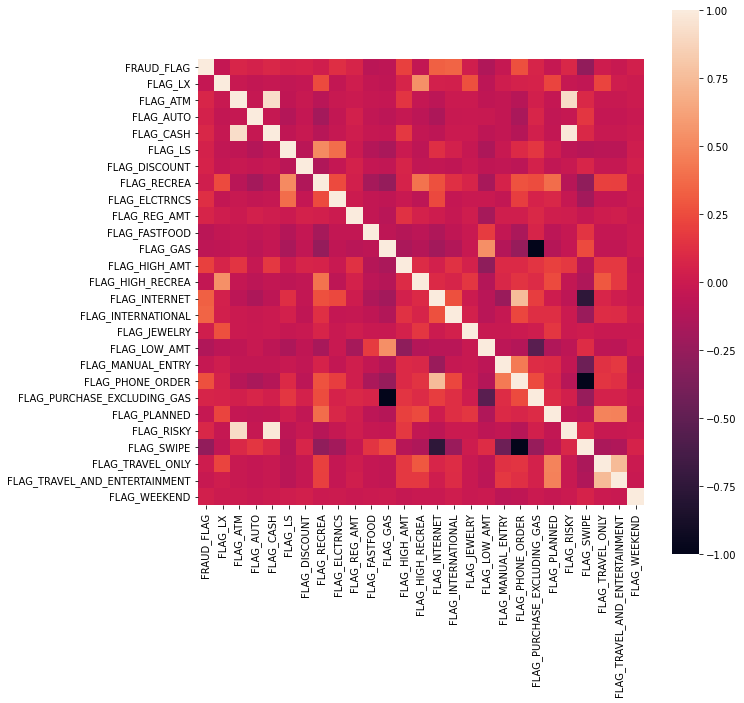

In [ ]:
corr = downsample.iloc[:,[3]+list(range(10,36))].corr()
corr
plt.figure(figsize = (10,10))
sns.heatmap(corr, square=True)
plt.show()

In [ ]:
# extract the label and feature
x_down = downsample.drop(['FRAUD_FLAG'], axis=1)
y_down = downsample['FRAUD_FLAG']

In [ ]:
# train test split for downsample
train_x_down,test_x_down,train_y_down,test_y_down = train_test_split(x_down,y_down,test_size=0.2, random_state=123)

In [ ]:
df = pd.read_csv(
    os.path.join(DIR_PATH, f"train_after_clean.csv")
)
df['EVENT_TIME'] = pd.to_timedelta(df['EVENT_TIME'].astype(str)).dt.total_seconds()/3600
df.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,CITY,...,"Treasury Bills, 1-month","Treasury Bills, 2-month","Treasury Bills, 3-month","Treasury Bills, 6-month","Treasury Bills, 1-year","Operating band, low","Operating band, high",Bank rate,Target rate,month_for_predict
0,2,4,14.266667,1.0,537.10,11.70,29200.0,1,Missing,Missing,...,0.07,0.05,0.07,0.08,0.11,0.25,0.5,0.5,0.25,2
1,2,4,12.850000,0.0,20371.88,96.35,30700.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,lasalle,...,0.07,0.05,0.07,0.08,0.11,0.25,0.5,0.5,0.25,2
2,2,4,15.433333,0.0,15628.17,193.72,19500.0,0,Missing,Missing,...,0.07,0.05,0.07,0.08,0.11,0.25,0.5,0.5,0.25,2
3,2,4,16.316667,0.0,12913.98,47.15,18400.0,0,Missing,Missing,...,0.07,0.05,0.07,0.08,0.11,0.25,0.5,0.5,0.25,2
4,2,4,8.250000,0.0,26779.35,121.88,29200.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,rockland,...,0.07,0.05,0.07,0.08,0.11,0.25,0.5,0.5,0.25,2


In [ ]:
df_test['EVENT_TIME'] = pd.to_timedelta(df_test['EVENT_TIME'].astype(str)).dt.total_seconds()/3600

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


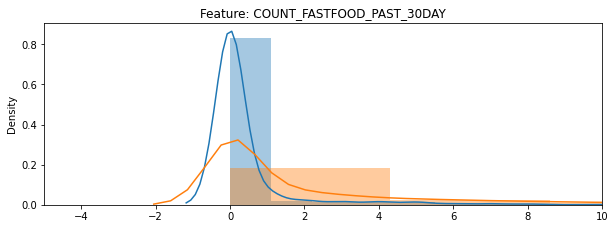

In [ ]:
# draw the density plots
plt.figure(figsize=(10,30*4))
import matplotlib.gridspec as gridspec
features = df.iloc[:,160:161].columns
gs = gridspec.GridSpec(30, 1)
for i, feature in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    plt.xlim(-5,10)
    sns.distplot(df[feature][df['FRAUD_FLAG'] == 1], bins=20)
    sns.distplot(df[feature][df['FRAUD_FLAG'] == 0], bins=20)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

Find more insights from important columns (suggessted by the model)

In [ ]:
important_cols = ['AMOUNT', 'USER_AGENT', 'AVAIL_CRDT', 'EVENT_TIME', 'CREDIT_LIMIT', 'COUNT_PHONE_ORDER_PAST_7DAY', 'COUNT_PHONE_ORDER_PAST_30DAY', 'SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY', 'COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY', 'SUM_SWIPE_PAST_7DAY']
target = ['FRAUD_FLAG'] 
df_temp = df[important_cols + target]
df_temp['AMOUNT'] = pd.qcut(df_temp['AMOUNT'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
df_temp[df_temp['FRAUD_FLAG'] == 1]['AMOUNT'].value_counts(normalize=True)

<ipython-input-258-00cd7fe508a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['AMOUNT'] = pd.qcut(df_temp['AMOUNT'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


(169.12, 73126.95]    0.253482
(86.78, 169.12]       0.142061
(37.92, 53.62]        0.103993
(0.969, 1.02]         0.101671
(53.62, 86.78]        0.093779
(10.72, 18.45]        0.071031
(18.45, 26.32]        0.071031
(26.32, 37.92]        0.065924
(5.85, 10.72]         0.048747
(1.02, 5.85]          0.048282
Name: AMOUNT, dtype: float64

In [ ]:
df_temp['EVENT_TIME'] = pd.qcut(df_temp['EVENT_TIME'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
df_temp[df_temp['FRAUD_FLAG'] == 1]['EVENT_TIME'].value_counts(normalize=True)

<ipython-input-259-cf0228414bd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['EVENT_TIME'] = pd.qcut(df_temp['EVENT_TIME'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


(-0.001, 8.733]     0.232126
(20.7, 23.983]      0.128598
(8.733, 11.067]     0.107707
(17.517, 18.983]    0.088208
(18.983, 20.7]      0.087744
(16.2, 17.517]      0.073816
(13.733, 14.967]    0.072888
(12.517, 13.733]    0.071959
(11.067, 12.517]    0.070102
(14.967, 16.2]      0.066852
Name: EVENT_TIME, dtype: float64

In [ ]:
df_temp['CREDIT_LIMIT'] = pd.qcut(df_temp['CREDIT_LIMIT'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
df_temp[df_temp['FRAUD_FLAG'] == 1]['CREDIT_LIMIT'].value_counts(normalize=True)

<ipython-input-260-0d9d3e6e79e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['CREDIT_LIMIT'] = pd.qcut(df_temp['CREDIT_LIMIT'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


(-0.001, 2000.0]       0.127669
(2000.0, 6800.0]       0.122563
(10400.0, 14600.0]     0.115599
(25800.0, 29700.0]     0.100743
(29700.0, 102500.0]    0.099350
(17500.0, 19500.0]     0.091922
(6800.0, 10400.0]      0.090529
(14600.0, 17500.0]     0.088208
(20500.0, 25800.0]     0.083101
(19500.0, 20500.0]     0.080316
Name: CREDIT_LIMIT, dtype: float64

In [ ]:
df_temp['COUNT_PHONE_ORDER_PAST_30DAY'] = pd.qcut(df_temp['COUNT_PHONE_ORDER_PAST_30DAY'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
df_temp[df_temp['FRAUD_FLAG'] == 1]['COUNT_PHONE_ORDER_PAST_30DAY'].value_counts(normalize=True)

<ipython-input-261-6f1caa3d5e6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['COUNT_PHONE_ORDER_PAST_30DAY'] = pd.qcut(df_temp['COUNT_PHONE_ORDER_PAST_30DAY'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


(-0.001, 3.0]    0.455896
(3.0, 9.0]       0.221913
(9.0, 18.0]      0.118384
(18.0, 27.0]     0.051068
(88.0, 968.0]    0.032962
(27.0, 36.0]     0.030176
(36.0, 46.0]     0.026927
(68.0, 88.0]     0.024605
(46.0, 56.0]     0.019034
(56.0, 68.0]     0.019034
Name: COUNT_PHONE_ORDER_PAST_30DAY, dtype: float64

In [ ]:
df_temp['SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY'] = pd.qcut(df_temp['SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
df_temp[df_temp['FRAUD_FLAG'] == 1]['SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY'].value_counts(normalize=True)

<ipython-input-262-c3b4489333b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY'] = pd.qcut(df_temp['SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


(-0.001, 132.196]      0.358867
(132.196, 475.6]       0.199164
(475.6, 1021.92]       0.135562
(1021.92, 1668.22]     0.084494
(7355.4, 375982.42]    0.051996
(1668.22, 2300.18]     0.045497
(2300.18, 2976.68]     0.036676
(2976.68, 3799.57]     0.032033
(5013.27, 7355.4]      0.028319
(3799.57, 5013.27]     0.027391
Name: SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY, dtype: float64

In [ ]:
df_temp['COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY'] = pd.qcut(df_temp['COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
df_temp[df_temp['FRAUD_FLAG'] == 1]['COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY'].value_counts(normalize=True)

<ipython-input-263-668e1c598c45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY'] = pd.qcut(df_temp['COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY'], q = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


(-0.001, 3.0]    0.471216
(3.0, 8.0]       0.198236
(8.0, 15.0]      0.103064
(15.0, 23.0]     0.066388
(80.0, 968.0]    0.036212
(23.0, 32.0]     0.032033
(32.0, 41.0]     0.027391
(50.0, 62.0]     0.023677
(62.0, 80.0]     0.022284
(41.0, 50.0]     0.019499
Name: COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY, dtype: float64

## Data Exploration Summary for top columns:



*   Amount: in the range (169.12, 73126.95], it has 10% of data but includes 0.253482 fraud. (others are with similar words)
*   Event_time: (-0.001, 8.733]     0.232126
*   CREDIT_LIMIT: less limit will cause more fraud
*   COUNT_PHONE_ORDER_PAST_30DAY: (-0.001, 3.0]    0.455896
*   SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY: (-0.001, 132.196]      0.358867
*   COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY: (-0.001, 3.0]    0.471216

## Business ideas

*   Between 12:00 am and 8:45 each day, compare with average, the fraud rate is more than twice.
*   Less credit limit will cause more fraud
*   SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY between 0 and 132, compare with average, the fraud rate is more than triple.

<a name="4"></a>
# Data Preprocessing

### Description

*   Preprocess data for event time to the numerical data 
*   non-binary categorical columns encode by frequency
*   numeric values has the same range by Min Max Scaler, scale the data range between 0 and 1
*   Adding interactions between variables. We choose to not using interactions because it makes our model worse
*   Remove duplicate columns and columns that are too similar by cross_validation score
*   Remove columns with low prediction power by cross_validation score between each column and the target column

In [ ]:
df_cat = df.select_dtypes('object')
df_cat_cols = df_cat.columns
for col in df_cat_cols:
    # using frequency encoding
    freq_encoding = df[col].value_counts()
    df[col] = df[col].map(freq_encoding)
    df_test[col] = df_test[col].map(freq_encoding)

scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)
df_test = pd.DataFrame(scaler.transform(df_test), columns=df.columns)
df.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,CITY,...,"Treasury Bills, 1-month","Treasury Bills, 2-month","Treasury Bills, 3-month","Treasury Bills, 6-month","Treasury Bills, 1-year","Operating band, low","Operating band, high",Bank rate,Target rate,month_for_predict
0,0.0,0.666667,0.594858,1.0,0.005588,0.000147,0.284878,1.0,1.000000,1.000000,...,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.666667,0.535789,0.0,0.211968,0.001304,0.299512,1.0,0.016166,0.000142,...,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.666667,0.643502,0.0,0.162610,0.002636,0.190244,0.0,1.000000,1.000000,...,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.666667,0.680334,0.0,0.134369,0.000632,0.179512,0.0,1.000000,1.000000,...,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.666667,0.343989,0.0,0.278638,0.001653,0.284878,1.0,0.016166,0.000026,...,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,CITY,...,"Treasury Bills, 1-month","Treasury Bills, 2-month","Treasury Bills, 3-month","Treasury Bills, 6-month","Treasury Bills, 1-year","Operating band, low","Operating band, high",Bank rate,Target rate,month_for_predict
0,0.8,1.000000,0.431550,NaN,0.088936,0.000000,0.200000,0.0,1.0,1.0,...,0.375,0.500,0.625,0.5,0.750000,0.0,0.0,0.0,0.0,0.8
1,0.2,0.333333,0.706046,NaN,0.256390,0.000493,0.299512,0.0,1.0,1.0,...,0.750,0.875,0.750,1.0,0.916667,0.0,0.0,0.0,0.0,0.2
2,0.4,0.666667,0.822099,NaN,0.036229,0.002496,0.049756,0.0,1.0,1.0,...,0.000,0.250,0.250,0.4,0.416667,0.0,0.0,0.0,0.0,0.4
3,0.2,0.500000,0.539263,NaN,0.170343,0.000365,0.170732,0.0,1.0,1.0,...,0.750,0.875,0.750,1.0,0.916667,0.0,0.0,0.0,0.0,0.2
4,0.6,0.833333,0.411397,NaN,0.002912,0.000733,0.044878,0.0,1.0,1.0,...,0.125,0.125,0.500,0.7,0.750000,0.0,0.0,0.0,0.0,0.6


In [ ]:
X = df.drop(['FRAUD_FLAG'], axis = 1)
y = df['FRAUD_FLAG']

In [ ]:
%%time
model = LogisticRegression(random_state=1234)
scoring = {'roc_auc': 'roc_auc', 'recall': 'recall', 'precision': 'precision', 'accuracy': 'accuracy', 'f1': 'f1' }
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))
print("Recall: %0.3f (+/- %0.3f)" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("Precision: %0.3f (+/- %0.3f)" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F-1 score: %0.3f (+/- %0.3f)" % (scores['test_f1'].mean(), scores['test_f1'].std()))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

ROC-AUC: 0.921 (+/- 0.004)
Recall: 0.167 (+/- 0.025)
Precision: 0.711 (+/- 0.054)
Accuracy: 0.978 (+/- 0.000)
F-1 score: 0.269 (+/- 0.029)
CPU times: user 20.8 s, sys: 3.28 s, total: 24.1 s
Wall time: 13 s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
%%time
model = RidgeClassifier(random_state=1234)
scoring = {'roc_auc': 'roc_auc', 'recall': 'recall', 'precision': 'precision', 'accuracy': 'accuracy', 'f1': 'f1' }
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))
print("Recall: %0.3f (+/- %0.3f)" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("Precision: %0.3f (+/- %0.3f)" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F-1 score: %0.3f (+/- %0.3f)" % (scores['test_f1'].mean(), scores['test_f1'].std()))

ROC-AUC: 0.913 (+/- 0.006)
Recall: 0.025 (+/- 0.008)
Precision: 0.772 (+/- 0.120)
Accuracy: 0.976 (+/- 0.000)
F-1 score: 0.048 (+/- 0.015)
CPU times: user 2.49 s, sys: 1.05 s, total: 3.54 s
Wall time: 2.22 s


In [ ]:
# # Code for add interactions by definitions
# col_index = list(range(36,63)) + list(range(71,87)) + list(range(99,124)) + list(range(138,157))
# df_amount_div = df.iloc[:,col_index].div(df["AMOUNT"]+0.00001, axis=0)
# df_amount_div = df_amount_div.add_prefix("amount_rate_")
# df_credit_div = df.iloc[:,col_index].div(df["CREDIT_LIMIT"]+0.00001, axis=0)
# df_credit_div = df_credit_div.add_prefix("credit_rate_")
# df = pd.concat([df,df_amount_div,df_credit_div], axis = 1)
# df.head()

In [ ]:
%%time
columns_to_remove = set()
corr_matrix = df.corr()
correlated_pairs = set()
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and corr_matrix.loc[col1, col2] >= 0.9999:
            correlated_pairs.add((col1, col2))
for col1, col2 in correlated_pairs:
    columns_to_remove.add(col1)
df = df.drop(columns_to_remove, axis=1)
df_test = df_test.drop(columns_to_remove, axis=1)
print(df.shape)

(89230, 195)
CPU times: user 8.83 s, sys: 68.9 ms, total: 8.9 s
Wall time: 8.82 s


In [ ]:
# remove columns with low prediction power by correlation
corr_with_target = df.corr()['FRAUD_FLAG']
columns_to_remove = corr_with_target[corr_with_target.abs() < 0.0001].index
df = df.drop(columns_to_remove, axis=1)
df_test = df_test.drop(columns_to_remove, axis=1)
print(df.shape)

(89230, 192)


Compare the performance between old and new data

In [ ]:
X = df.drop(['FRAUD_FLAG'], axis = 1)
y = df['FRAUD_FLAG']

In [ ]:
%%time
model = LogisticRegression(random_state=1234)
scoring = {'roc_auc': 'roc_auc', 'recall': 'recall', 'precision': 'precision', 'accuracy': 'accuracy', 'f1': 'f1' }
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))
print("Recall: %0.3f (+/- %0.3f)" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("Precision: %0.3f (+/- %0.3f)" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F-1 score: %0.3f (+/- %0.3f)" % (scores['test_f1'].mean(), scores['test_f1'].std()))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

ROC-AUC: 0.922 (+/- 0.005)
Recall: 0.165 (+/- 0.026)
Precision: 0.707 (+/- 0.045)
Accuracy: 0.978 (+/- 0.000)
F-1 score: 0.265 (+/- 0.031)
CPU times: user 21.5 s, sys: 3.38 s, total: 24.9 s
Wall time: 13 s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
%%time
model = RidgeClassifier(random_state=1234)
scoring = {'roc_auc': 'roc_auc', 'recall': 'recall', 'precision': 'precision', 'accuracy': 'accuracy', 'f1': 'f1' }
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))
print("Recall: %0.3f (+/- %0.3f)" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("Precision: %0.3f (+/- %0.3f)" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F-1 score: %0.3f (+/- %0.3f)" % (scores['test_f1'].mean(), scores['test_f1'].std()))

ROC-AUC: 0.914 (+/- 0.006)
Recall: 0.026 (+/- 0.008)
Precision: 0.772 (+/- 0.120)
Accuracy: 0.976 (+/- 0.000)
F-1 score: 0.049 (+/- 0.014)
CPU times: user 2.47 s, sys: 1.08 s, total: 3.55 s
Wall time: 2.24 s


In [ ]:
column = 'EVENT_TIME'
grouped = df.groupby('FRAUD_FLAG')
print(grouped[column].mean()[0])
print(grouped[column].std()[0])

0.6136921087937335
0.1999169668581391


In [ ]:
# Group data by target variable "y"
grouped = df.groupby('FRAUD_FLAG')

# Create an empty list to store columns to be deleted
to_delete = []

# Iterate through each column in the dataset
for column in df.columns:
    if column != 'y':  # skipping the target variable column
        # Calculate mean and standard deviation for each group of the target variable
        mean_0 = grouped[column].mean()[0]
        std_0 = grouped[column].std()[0]
        mean_1 = grouped[column].mean()[1]
        std_1 = grouped[column].std()[1]
        
        # Compare mean and standard deviation for each group of the target variable
        if abs(mean_0 - mean_1) < 0.0003 and abs(std_0 - std_1) < 0.0001:
            # If mean and standard deviation are similar, add column to the list of columns to be deleted
            to_delete.append(column)

# Delete columns from the dataset
df = df.drop(columns = to_delete)
df_test = df_test.drop(columns = to_delete)
df.shape

(89230, 188)

<a name="5"></a>
# Data Modeling

### Description

*   Models: LogisticRegression, Rigid Classification, XGBoost
*   Compare Methods: Mainly using ROC_AUC, also using Reccall, Precision and Accuracy Score
*   Parameter Pruning for Xgboost, and choose Xgboost since it has better solutions
*   The best model: xgb.XGBClassifier(class_weight={0: counts_precentages[0], 1: counts_precentages[1]}, eta= 0.01, max_depth=6,subsample = 1, colsample_bytree = 0.3, gpu_id=0, n_estimators = 200, objective = 'binary:logistic', tree_method = 'gpu_hist', random_state = 1234)
*   The best score: AUC = 0.962


In [ ]:
X = df.drop(['FRAUD_FLAG'], axis = 1)
y = df['FRAUD_FLAG']

In [ ]:
%%time
model = LogisticRegression(random_state=1234)
scoring = {'roc_auc': 'roc_auc', 'recall': 'recall', 'precision': 'precision', 'accuracy': 'accuracy'}
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))
print("Recall: %0.3f (+/- %0.3f)" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("Precision: %0.3f (+/- %0.3f)" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

ROC-AUC: 0.922 (+/- 0.004)
Recall: 0.165 (+/- 0.026)
Precision: 0.706 (+/- 0.046)
Accuracy: 0.978 (+/- 0.000)
CPU times: user 20.9 s, sys: 3.07 s, total: 24 s
Wall time: 12.5 s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
%%time
model = RidgeClassifier(random_state=1234)
scoring = {'roc_auc': 'roc_auc', 'recall': 'recall', 'precision': 'precision', 'accuracy': 'accuracy'}
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))
print("Recall: %0.3f (+/- %0.3f)" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("Precision: %0.3f (+/- %0.3f)" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))

ROC-AUC: 0.914 (+/- 0.006)
Recall: 0.026 (+/- 0.008)
Precision: 0.772 (+/- 0.120)
Accuracy: 0.976 (+/- 0.000)
CPU times: user 2.45 s, sys: 1.01 s, total: 3.46 s
Wall time: 2.13 s


In [ ]:
%%time
counts_precentages = pd.Series(y).value_counts()/len(y)
model = XGBClassifier(tree_method='gpu_hist', class_weight={0: counts_precentages[0], 1: counts_precentages[1]}, random_state=1234)
scoring = {'roc_auc': 'roc_auc', 'recall': 'recall', 'precision': 'precision', 'accuracy': 'accuracy'}
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))
print("Recall: %0.3f (+/- %0.3f)" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("Precision: %0.3f (+/- %0.3f)" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))

ROC-AUC: 0.956 (+/- 0.004)
Recall: 0.270 (+/- 0.012)
Precision: 0.764 (+/- 0.049)
Accuracy: 0.980 (+/- 0.001)
CPU times: user 6.29 s, sys: 946 ms, total: 7.24 s
Wall time: 7.21 s


In [ ]:
df.head()

,EVENT_DAY_OF_WEEK,EVENT_TIME,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,FLAG_LX,FLAG_ATM,...,"Real return benchmark bond yield, long term","Government of Canada marketable bonds, 1 to 3 years","Government of Canada marketable bonds, 3 to 5 years","Government of Canada marketable bonds, 5 to 10 years","Government of Canada marketable bonds, over 10 years","Treasury Bills, 1-month","Treasury Bills, 2-month","Treasury Bills, 3-month","Treasury Bills, 6-month","Treasury Bills, 1-year"
0,0.666667,0.594858,1.0,0.005588,0.000147,0.284878,1.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0
1,0.666667,0.535789,0.0,0.211968,0.001304,0.299512,1.0,0.016166,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0
2,0.666667,0.643502,0.0,0.162610,0.002636,0.190244,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0
3,0.666667,0.680334,0.0,0.134369,0.000632,0.179512,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0
4,0.666667,0.343989,0.0,0.278638,0.001653,0.284878,1.0,0.016166,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0


## Parameter Selection for Xgboost

In [ ]:
X = df.drop(['FRAUD_FLAG'], axis = 1)
y = df['FRAUD_FLAG']

I commented the following code because it needs a long time to run. The solution is below

In [ ]:
# %%time
# #dtrain = xgb.DMatrix(X, label=y)
# param_grid = {'max_depth': [2, 3, 5, 6, 7],
#               'eta': [0.01, 0.1, 0.3, 0.5],
#               'tree_method': ['gpu_hist'],
#               'objective': ['binary:logistic']
#               }
# model = xgb.XGBClassifier(class_weight={0: counts_precentages[0], 1: counts_precentages[1]}, 
#                           gpu_id=0,
#                           random_state = 1234)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
# grid_search.fit(X, y)
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [ ]:
# %%time
# param_grid = {'subsample': [0.5, 0.7, 0.9, 1],
#               'colsample_bytree': [0.3, 0.5, 0.7, 0.9, 1],
#               'tree_method': ['gpu_hist'],
#               'objective': ['binary:logistic']
#               }
# model = xgb.XGBClassifier(class_weight={0: counts_precentages[0], 1: counts_precentages[1]},
#                           eta= 0.01, max_depth=6,gpu_id=0, random_state = 1234)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
# grid_search.fit(X, y)
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [ ]:
# %%time
# param_grid = {
#               'n_estimators': [25,50,75,100,200,400,800,1600],
#               'tree_method': ['gpu_hist'],
#               'objective': ['binary:logistic', 'binary:hinge']
#               }
# model = xgb.XGBClassifier(class_weight={0: counts_precentages[0], 1: counts_precentages[1]},
#                           eta= 0.01, max_depth=6,subsample = 1, colsample_bytree = 0.3, 
#                           gpu_id=0, random_state = 1234)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
# grid_search.fit(X, y)
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

The best model:

xgb.XGBClassifier(class_weight={0: counts_precentages[0], 1: counts_precentages[1]}, eta= 0.01, max_depth=6,subsample = 1, colsample_bytree = 0.3, gpu_id=0, n_estimators = 200, objective = 'binary:logistic', tree_method = 'gpu_hist', random_state = 1234)

AUC: 0.962

In [ ]:
%%time
counts_precentages = pd.Series(y).value_counts()/len(y)
model = XGBClassifier(class_weight={0: counts_precentages[0], 1: counts_precentages[1]}, eta= 0.01, max_depth=6,subsample = 1, colsample_bytree = 0.3, gpu_id=0, n_estimators = 200, objective = 'binary:logistic', tree_method = 'gpu_hist', random_state = 1234)
scoring = {'roc_auc': 'roc_auc', 'recall': 'recall', 'precision': 'precision', 'accuracy': 'accuracy'}
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))
print("Recall: %0.3f (+/- %0.3f)" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("Precision: %0.3f (+/- %0.3f)" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))

ROC-AUC: 0.962 (+/- 0.004)
Recall: 0.383 (+/- 0.012)
Precision: 0.777 (+/- 0.020)
Accuracy: 0.982 (+/- 0.000)
CPU times: user 13.3 s, sys: 173 ms, total: 13.5 s
Wall time: 13.4 s


In [ ]:
df.head()

,EVENT_DAY_OF_WEEK,EVENT_TIME,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,FLAG_LX,FLAG_ATM,...,"Real return benchmark bond yield, long term","Government of Canada marketable bonds, 1 to 3 years","Government of Canada marketable bonds, 3 to 5 years","Government of Canada marketable bonds, 5 to 10 years","Government of Canada marketable bonds, over 10 years","Treasury Bills, 1-month","Treasury Bills, 2-month","Treasury Bills, 3-month","Treasury Bills, 6-month","Treasury Bills, 1-year"
0,0.666667,0.594858,1.0,0.005588,0.000147,0.284878,1.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0
1,0.666667,0.535789,0.0,0.211968,0.001304,0.299512,1.0,0.016166,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0
2,0.666667,0.643502,0.0,0.162610,0.002636,0.190244,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0
3,0.666667,0.680334,0.0,0.134369,0.000632,0.179512,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0
4,0.666667,0.343989,0.0,0.278638,0.001653,0.284878,1.0,0.016166,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0


In [ ]:
df_test.head()

,EVENT_DAY_OF_WEEK,EVENT_TIME,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,FLAG_LX,FLAG_ATM,...,"Real return benchmark bond yield, long term","Government of Canada marketable bonds, 1 to 3 years","Government of Canada marketable bonds, 3 to 5 years","Government of Canada marketable bonds, 5 to 10 years","Government of Canada marketable bonds, over 10 years","Treasury Bills, 1-month","Treasury Bills, 2-month","Treasury Bills, 3-month","Treasury Bills, 6-month","Treasury Bills, 1-year"
0,1.000000,0.431550,NaN,0.088936,0.000000,0.200000,0.0,1.0,0.0,0.0,...,0.636292,0.566667,0.754717,0.869565,0.919355,0.375,0.500,0.625,0.5,0.750000
1,0.333333,0.706046,NaN,0.256390,0.000493,0.299512,0.0,1.0,0.0,0.0,...,0.428712,0.533333,0.679245,0.681159,0.548387,0.750,0.875,0.750,1.0,0.916667
2,0.666667,0.822099,NaN,0.036229,0.002496,0.049756,0.0,1.0,0.0,0.0,...,0.659859,0.300000,0.754717,1.000000,0.887097,0.000,0.250,0.250,0.4,0.416667
3,0.500000,0.539263,NaN,0.170343,0.000365,0.170732,0.0,1.0,0.0,0.0,...,0.428712,0.533333,0.679245,0.681159,0.548387,0.750,0.875,0.750,1.0,0.916667
4,0.833333,0.411397,NaN,0.002912,0.000733,0.044878,0.0,1.0,0.0,0.0,...,1.000000,0.500000,0.754717,0.942029,1.000000,0.125,0.125,0.500,0.7,0.750000


<a name="6"></a>
# Interpret the model

### Description:


*   Feature Importance Plot with F-score in Xgboost
*   Find the best thresholds for F-1 Score and Accuracy Score
*   The best threshold: threshold = 0.2106


['AMOUNT', 'USER_AGENT', 'AVAIL_CRDT', 'EVENT_TIME', 'CREDIT_LIMIT', 'COUNT_PHONE_ORDER_PAST_7DAY', 'COUNT_PHONE_ORDER_PAST_30DAY', 'SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY', 'COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY', 'SUM_SWIPE_PAST_7DAY']


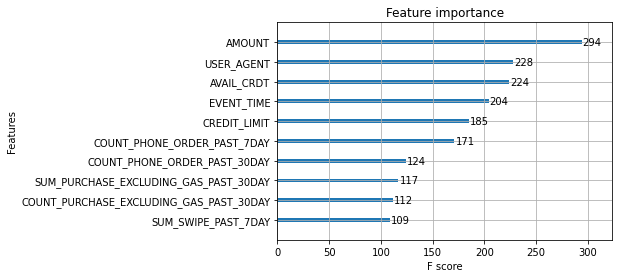

In [ ]:
clf = xgb.XGBClassifier(class_weight={0: counts_precentages[0], 1: counts_precentages[1]}, eta= 0.01, max_depth=6,subsample = 1, colsample_bytree = 0.3, gpu_id=0, n_estimators = 200, objective = 'binary:logistic', tree_method = 'gpu_hist', random_state = 1234)
clf.fit(X, y)
plot_importance(clf, importance_type='weight', max_num_features=10)

top_10_features = clf.get_booster().get_score(importance_type='weight')
top_10_features = sorted(top_10_features, key=top_10_features.get, reverse=True)[:10]
print(top_10_features)

In [ ]:
clf = xgb.XGBClassifier(class_weight={0: counts_precentages[0], 1: counts_precentages[1]}, eta= 0.01, max_depth=6,subsample = 1, colsample_bytree = 0.3, gpu_id=0, n_estimators = 200, objective = 'binary:logistic', tree_method = 'gpu_hist', random_state = 1234)

# Get predicted probabilities for each sample using cross-validation
y_proba = cross_val_predict(clf, X, y, cv=5, method='predict_proba')[:,1]

# Define the threshold
f1_list = []
accuracy_list = []

for threshold in tqdm(range(1,100,1)):
    threshold = threshold/100
    #threshold = 0.5

    # Get predicted labels based on the threshold
    y_pred = y_proba > threshold

    # Compute F-1 score
    f1 = f1_score(y, y_pred)
    # AUC are the same, no need to draw AUC graph
    accuracy = accuracy_score(y, y_pred)
    f1_list.append(f1)
    accuracy_list.append(accuracy)

best_index = f1_list.index(max(f1_list))
print('best threshold: ',list(range(1,100,1))[best_index]/100)
print('best F-1: ', f1_list[best_index])

  0%|          | 0/99 [00:00<?, ?it/s]

best threshold:  0.21
best F-1:  0.6089672094579522


In [ ]:
best_index = accuracy_list.index(max(accuracy_list))
print('best threshold: ',list(range(1,100,1))[best_index]/100)
print('best Accuracy: ', accuracy_list[best_index])

best threshold:  0.41
best Accuracy:  0.9828757144458142


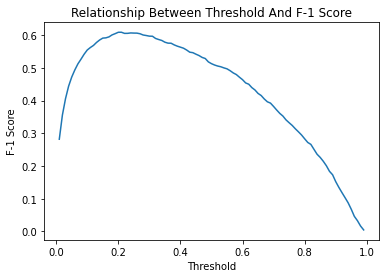

In [ ]:
# plot between thresholds and F-1 score

lis = list(range(1,100,1))
threshold = [i/100 for i in lis]
plt.plot(threshold,f1_list)
plt.xlabel('Threshold')
plt.ylabel('F-1 Score')
plt.title('Relationship Between Threshold And F-1 Score')
plt.show()

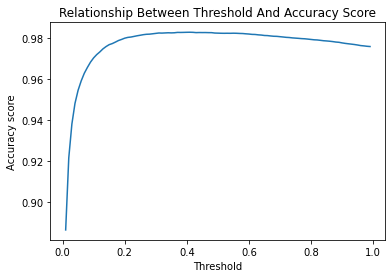

In [ ]:
# plot between thresholds and Accuracy score

lis = list(range(1,100,1))
threshold = [i/100 for i in lis]
plt.plot(threshold,accuracy_list)
plt.xlabel('Threshold')
plt.ylabel('Accuracy score')
plt.title('Relationship Between Threshold And Accuracy Score')
plt.show()

In [ ]:
# Maximize F-1
f1_list = []
for threshold in tqdm(range(2000,2200)):
    threshold = threshold/10000
    #threshold = 0.5

    # Get predicted labels based on the threshold
    y_pred = y_proba > threshold

    # Compute F-1 score
    f1 = f1_score(y, y_pred)
    f1_list.append(f1)

best_index = f1_list.index(max(f1_list))
print('best threshold: ',list(range(2000,2200))[best_index]/10000)
print('best F-1: ', f1_list[best_index])

  0%|          | 0/200 [00:00<?, ?it/s]

best threshold:  0.2106
best F-1:  0.609511051574012


<a name="7"></a>
# Submission File

In [ ]:
X_test = df_test.drop(['FRAUD_FLAG'], axis = 1)

In [ ]:
#test_transaction_id
# Final Model
clf = xgb.XGBClassifier(class_weight={0: counts_precentages[0], 1: counts_precentages[1]}, eta= 0.01, 
                        max_depth=6,subsample = 1, colsample_bytree = 0.3, gpu_id=0, n_estimators = 200, 
                        objective = 'binary:logistic', tree_method = 'gpu_hist', random_state = 1234)
clf.fit(X,y)
y_proba = clf.predict_proba(X_test)[:,1]
threshold = 0.2106
y_pred = 1 * (y_proba > threshold)

In [ ]:
print(test_transaction_id.shape)
print(y_proba.shape)
print(y_pred.shape)

(22307,)
(22307,)
(22307,)


In [ ]:
df_sample_submission = pd.read_csv(
    os.path.join(DIR_PATH, f"sample_submission.csv")
)
df_sample_submission.head()

,TRANSACTION_ID,PREDICTION,PROBABILITY
0,eed6f943,1,0.904510
1,f5cd3ab1,0,0.183158
2,9dc2fd8e,0,0.342235
3,ce5560f4,1,0.984052
4,ece4a7d1,0,0.014886


In [ ]:
col = df_sample_submission.columns
submission = pd.DataFrame({col[0]:test_transaction_id, col[1]: y_pred, col[2]: y_proba})
submission.head()

,TRANSACTION_ID,PREDICTION,PROBABILITY
0,eed6f943,0,0.000418
1,f5cd3ab1,0,0.000347
2,9dc2fd8e,0,0.000797
3,ce5560f4,0,0.000265
4,ece4a7d1,0,0.005061


In [ ]:
submission.to_csv("B4U_prediction.csv", index=False)

In [ ]:
submission['PREDICTION'].value_counts()

0    21691
1      616
Name: PREDICTION, dtype: int64

# Fraud Detection Score System

### Description:

*   Generate a credit Score System based on our final model
*   Fraud Score: minimum 0, maximum 1000. The higher the score is, the higher opportunity transaction has fraud

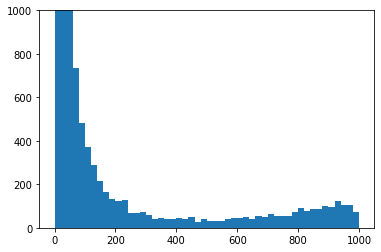

In [ ]:
y_train_proba = clf.predict_proba(X)[:,1]
credit_score = y_train_proba * 1000
plt.hist(credit_score, bins=50)
plt.ylim(0, 1000)
plt.show()

In [ ]:
# seperate groups for no risk, low risk, medium risk, high risk
credit_score_groups = pd.cut(credit_score, bins=[0,200,700,1000], labels = ['low risk', 'medium risk', 'high risk'])
credit_score_groups.value_counts()

low risk       86675
medium risk     1305
high risk       1250
dtype: int64

In [ ]:
compare_groups = pd.DataFrame({'Actual Label':y, 'Groups': credit_score_groups})
compare_groups.head()

,Actual Label,Groups
0,1.0,high risk
1,0.0,low risk
2,0.0,low risk
3,0.0,low risk
4,0.0,low risk


In [ ]:
compare_groups[compare_groups['Groups'] == 'high risk'].value_counts(normalize=True)

Actual Label  Groups   
1.0           high risk    0.9968
0.0           high risk    0.0032
dtype: float64

In [ ]:
compare_groups[compare_groups['Groups'] == 'medium risk'].value_counts(normalize=True)

Actual Label  Groups     
1.0           medium risk    0.558621
0.0           medium risk    0.441379
dtype: float64

In [ ]:
compare_groups[compare_groups['Groups'] == 'low risk'].value_counts(normalize=True)

Actual Label  Groups  
0.0           low risk    0.997935
1.0           low risk    0.002065
dtype: float64

In [ ]:
pd.DataFrame({'Groups': ['low risk', 'medium risk', 'high risk'], 
              'Fraud Score': ['0-200','200-700','700-1000'],
              'Probability of Fraud': ['0.021%', '55.862%','99.680%']})

,Groups,Fraud Score,Probability of Fraud
0,low risk,0-200,0.021%
1,medium risk,200-700,55.862%
2,high risk,700-1000,99.680%


# Top-10 Features Plot

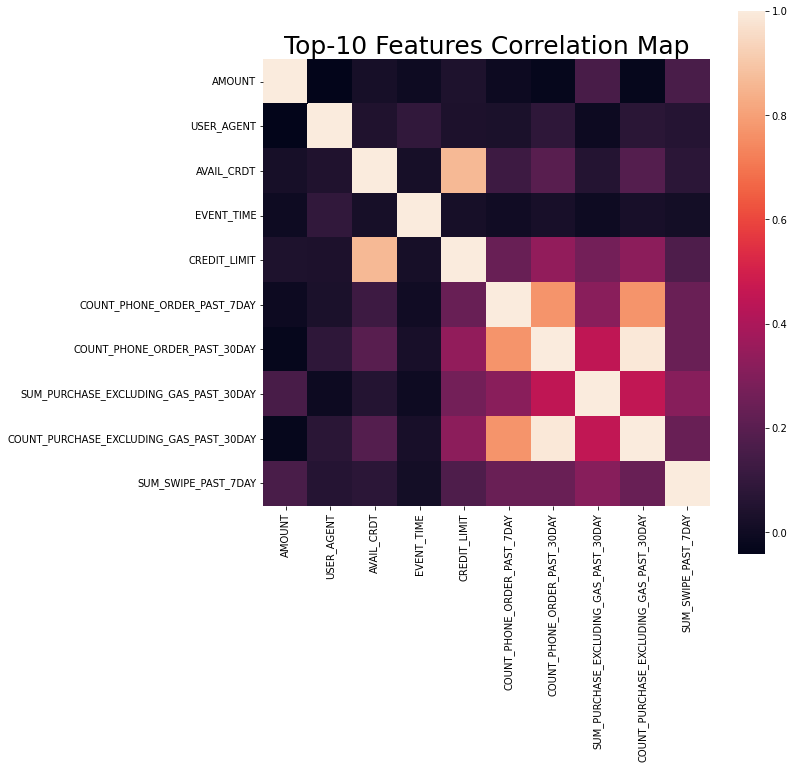

In [ ]:
corr = df[top_10_features].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, square=True)
plt.title('Top-10 Features Correlation Map', fontsize = 25)
plt.savefig('top_10_corr.jpg')
plt.show()